# Recruitment Data Challenge

The Bioinformatics & Biostatistics Group @ The Francis Crick Institute

## Introduction

Here you will find the data from an RNA-Seq and ATAC-Seq experiment. Both experiments have the same design. There is a treatment and control group each containing three replicates making a total of six samples per experiment. The data files are defined as follows (all files are tab delimited text files):

#### RNA-Seq Data

- **rnaseq_design.txt**: Sample ids and corresponding condition labels.
- **rnaseq_gene_counts.txt**: Raw (not normalised) gene-level read counts for each sample.
- **rnaseq_annotation.txt**: Gene level annotation.

#### ATAC-Seq Data

- **atacseq_design.txt**: Sample ids and corresponding condition labels.
- **atacseq_peak_counts.txt**: Raw (not normalised) ATAC-Seq peak level counts for each sample.
- **atacseq_peaks.bed**: A bed file defining the peak loci

All sequence data were aligned to the human genome reference hg38.

## The Challenge

The treatment here is thought to activate a transcriptional program via remodelling of the chromatin architecture. The aim here is to:  
1. Identify genes that may be regulated in this fashion.  
2. Identify the possible transcriptional programs involved.  
3. Present candidate transcription factors that may be responsible for the underlying regulation.  

Please produce a 20 minute presentation detailing your exploration of the data, your analysis approach and findings?


# Analysis
## Strategy

1. Identify genes with significant changes in expression.
2. Identify zones with significant changes in accessibility.
3. Detect hotspots in accessibility changes over gene regulatory areas of differentially expressed genes.
4. Detect enriched TF motifs in zones presenting accessibility changes.
5. Detect enriched TF motifs in hotspots.
6. Perform GO Analysis to put genes in context.

## GO Analysis with clusterProfiler

In [1]:
library(clusterProfiler)
library("org.Hs.eg.db")



Registered S3 method overwritten by 'enrichplot':
  method               from
  fortify.enrichResult DOSE

clusterProfiler v3.12.0  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are

Re-load files if necessary:

In [2]:
rna_diffx <- read.table(file="output/rna_diffx.bed", sep = "\t",col.names = c("chr","fstart","fend","name","score","strand"))
rna_cts <- as.matrix(read.csv("data_challenge/rnaseq_gene_counts.txt",sep="\t",row.names="featureid"))
rna_up <- read.table(file="output/rna_up.bed", sep = "\t", col.names = c("chr","fstart","fend","name","score","strand"))
rna_dw <- read.table(file="output/rna_dw.bed", sep = "\t", col.names = c("chr","fstart","fend","name","score","strand"))
head(rna_diffx,2)
head(rna_cts,2)

chr fstart    fend      name            score     strand
1 1   169853073 169888888 ENSG00000000457 0.4596662 -     
2 1    27612668  27626569 ENSG00000000938 1.9510985 -

s69 s70 s71 s75 s76 s77
ENSG00000000003 1   1   0   8   2   1  
ENSG00000000005 0   0   0   0   0   0

### GO Analysis for Up/Down Regulated Gene Sets

In [3]:
rna_bgd <- row.names(rna_cts[rowSums(rna_cts) > 0,])
rna_up_list <- as.vector(rna_up$name)
rna_dw_list <- as.vector(rna_dw$name)
rna_up_ego <- enrichGO(gene = rna_up_list, universe = rna_bgd, OrgDb = org.Hs.eg.db, keyType = "ENSEMBL")
rna_dw_ego <- enrichGO(gene = rna_dw_list, universe = rna_bgd, OrgDb = org.Hs.eg.db, keyType = "ENSEMBL")

In [4]:
rna_up_ego_gn <- setReadable(rna_up_ego, 'org.Hs.eg.db', 'ENSEMBL')
rna_dw_ego_gn <- setReadable(rna_dw_ego, 'org.Hs.eg.db', 'ENSEMBL')

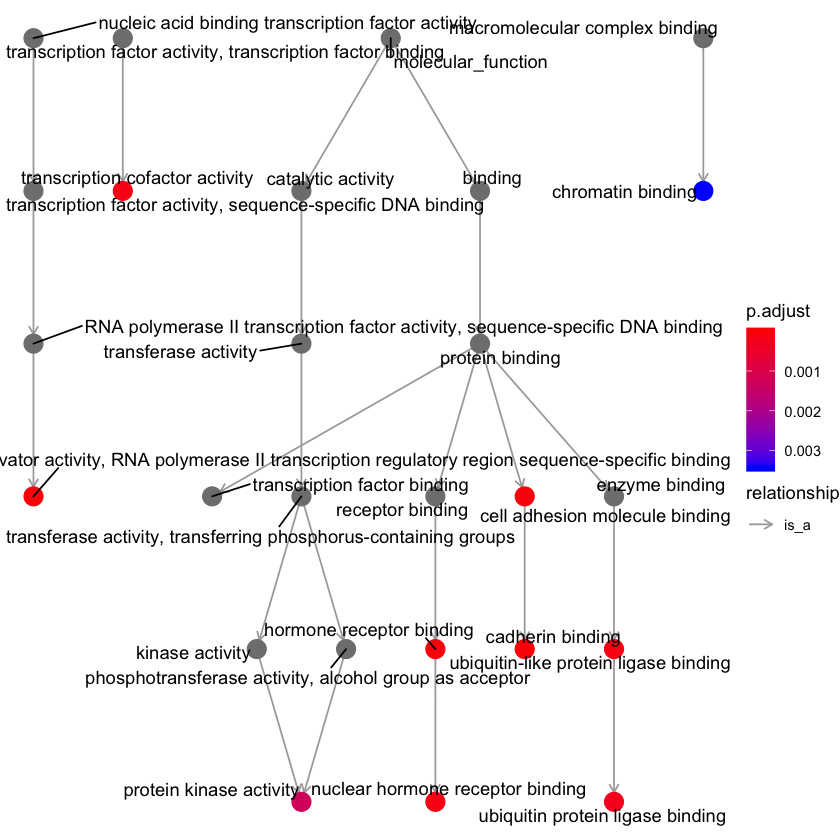

pdf 
  2

pdf 
  2

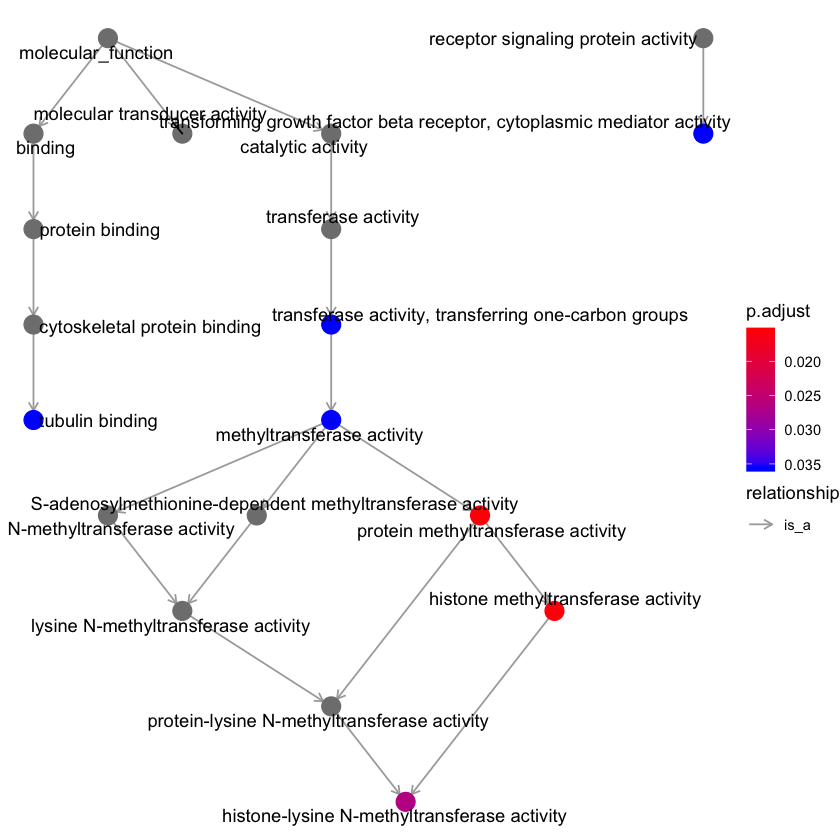

In [5]:
goplot(rna_up_ego_gn)
goplot(rna_dw_ego_gn)
png("output/plot/rna_up_goplot.png", width = 1600, height = 1600)
goplot(rna_up_ego_gn)
dev.off()
png("output/plot/rna_dw_goplot.png", width = 1600, height = 1600)
goplot(rna_dw_ego_gn)
dev.off()

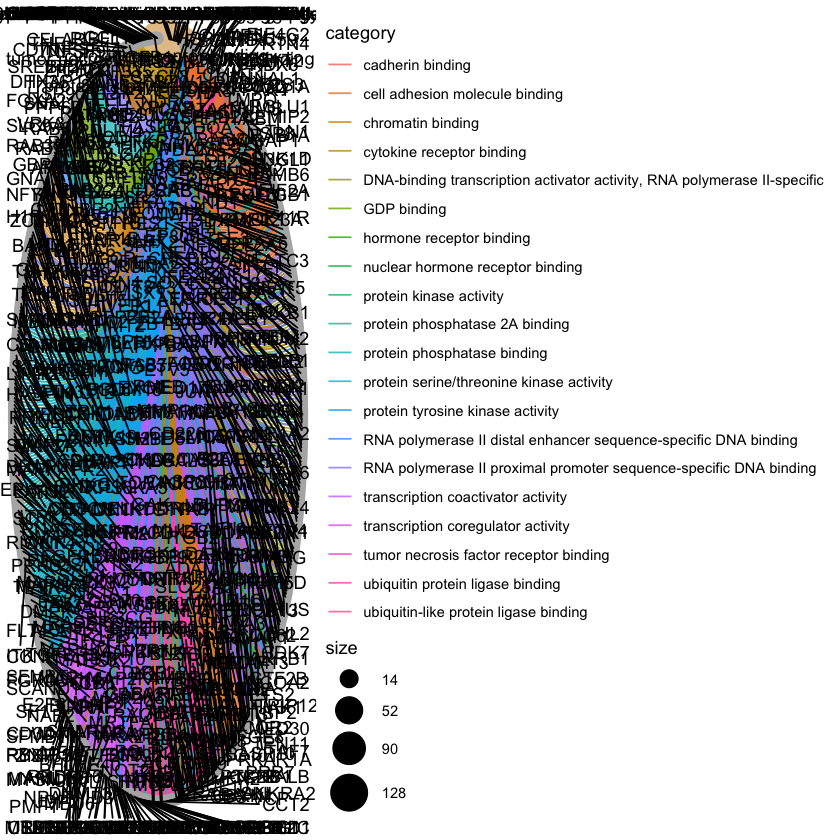

pdf 
  2

pdf 
  2

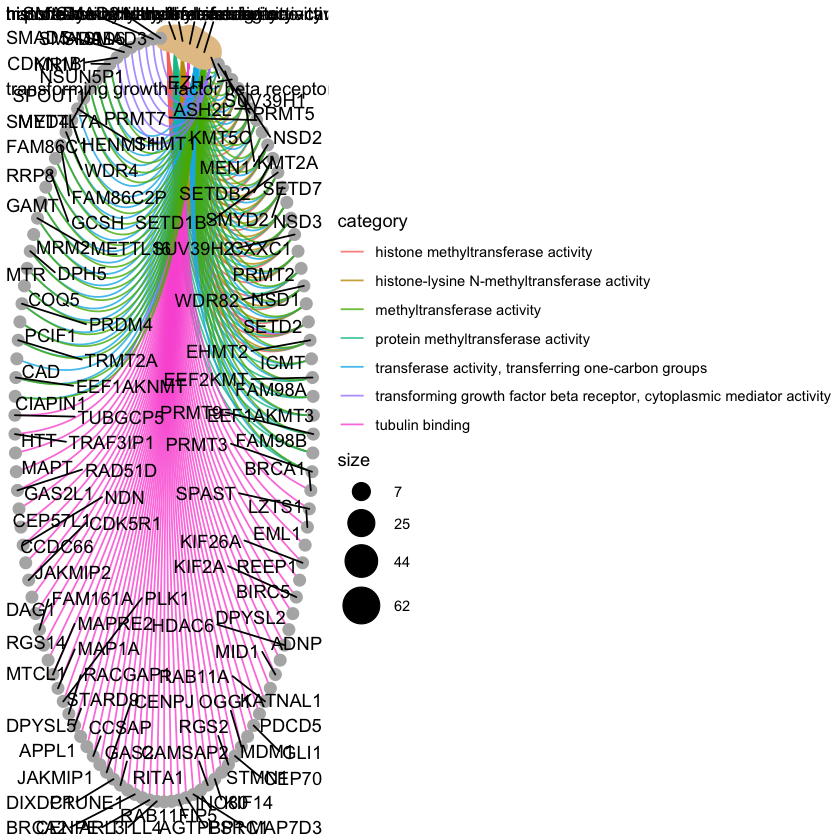

In [6]:
cnetplot(rna_up_ego_gn, circular=TRUE, colorEdge=TRUE, showCategory = 20)
cnetplot(rna_dw_ego_gn, circular=TRUE, colorEdge=TRUE, showCategory = 20)
png("output/plot/rna_up_cnet.png", width = 1600, height = 1600)
cnetplot(rna_up_ego_gn, circular=TRUE, colorEdge=TRUE, showCategory = 20)
dev.off()
png("output/plot/rna_dw_cnet.png", width = 1600, height = 1600)
cnetplot(rna_dw_ego_gn, circular=TRUE, colorEdge=TRUE, showCategory = 20)
dev.off()

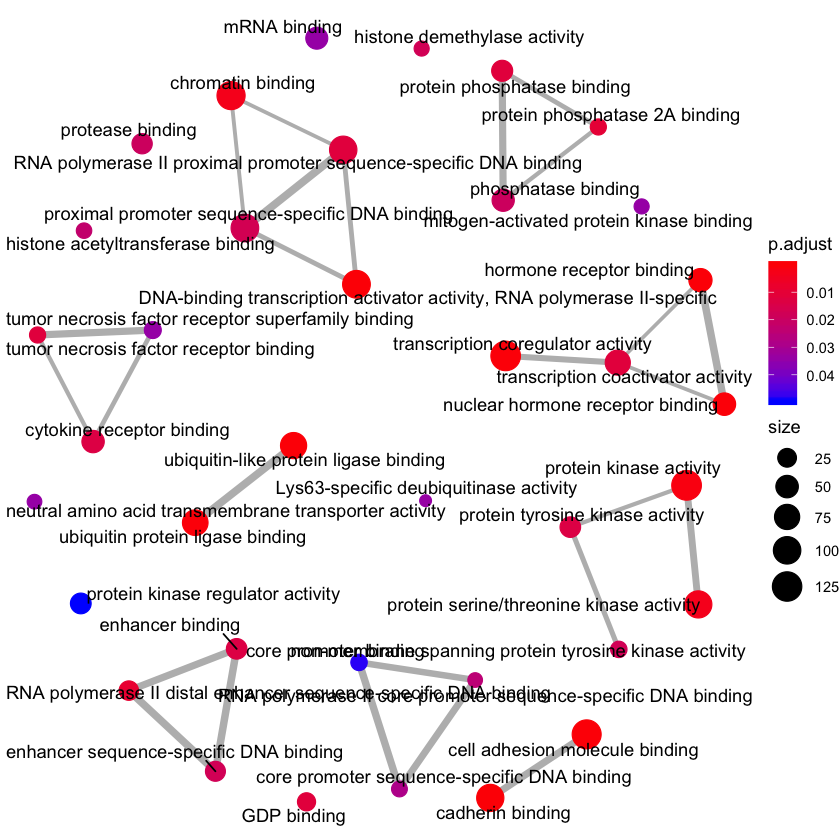

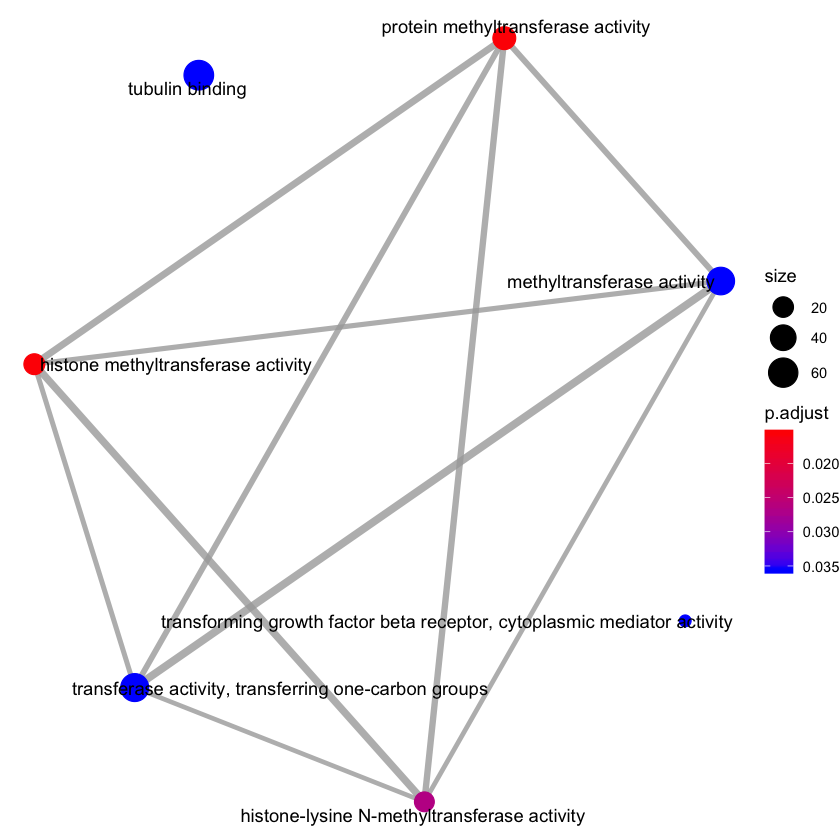

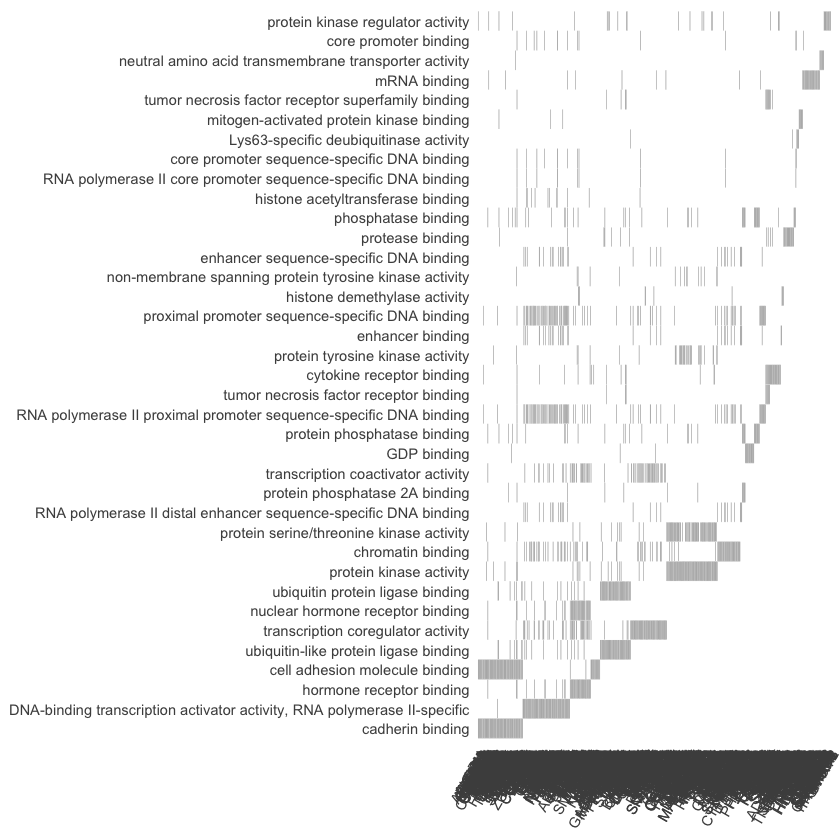

pdf 
  2

pdf 
  2

pdf 
  2

pdf 
  2

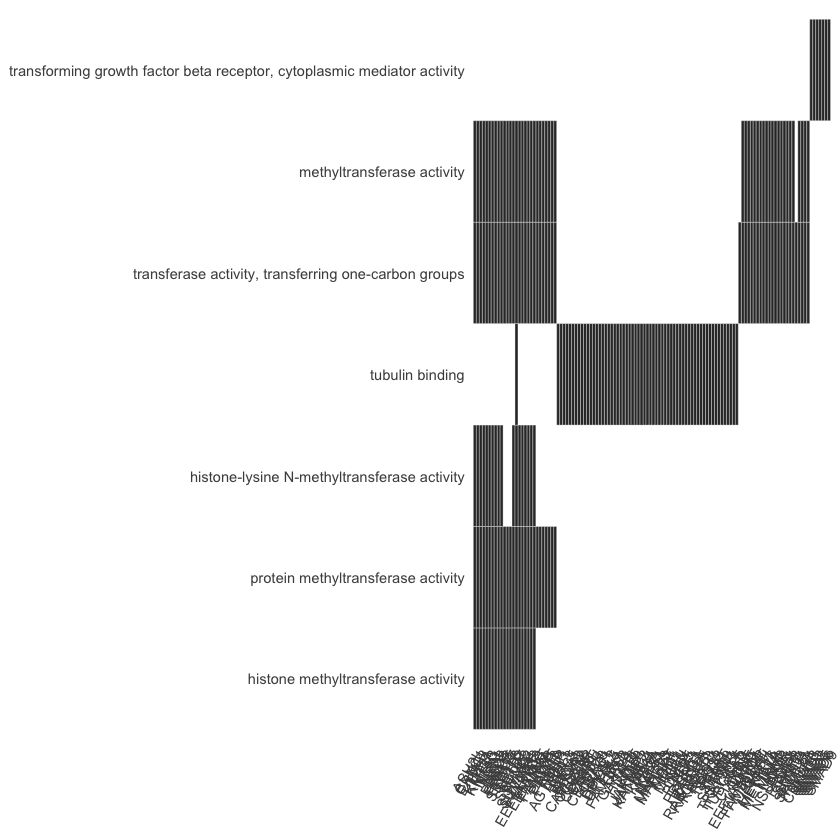

In [7]:
emapplot(rna_up_ego_gn, showCategory = 100)
emapplot(rna_dw_ego_gn, showCategory = 100)
heatplot(rna_up_ego_gn, showCategory = 50)
heatplot(rna_dw_ego_gn, showCategory = 50)
png("output/plot/rna_up_emap.png", width = 1000, height = 1000)
emapplot(rna_up_ego_gn, showCategory = 100)
dev.off()
png("output/plot/rna_dw_emap.png", width = 1000, height = 1000)
emapplot(rna_dw_ego_gn, showCategory = 100)
dev.off()
png("output/plot/rna_up_heat.png", width = 1600, height = 800)
heatplot(rna_up_ego_gn, showCategory = 50)
dev.off()
png("output/plot/rna_dw_heat.png", width = 1600, height = 800)
heatplot(rna_dw_ego_gn, showCategory = 50)
dev.off()

In [8]:
rna_dx_list <- rna_diffx[,5]
names(rna_dx_list) = as.character(rna_diffx[,4])
rna_dx_list = sort(rna_dx_list, decreasing = TRUE)
head(rna_dx_list)

ENSG00000198788 ENSG00000134460 ENSG00000054179 ENSG00000225968 ENSG00000120738 
      10.750062        9.957806        8.958687        7.974413        7.596323 
ENSG00000122877 
       7.289228

In [9]:
rna_gsea <- gseGO(geneList = rna_dx_list, OrgDb = org.Hs.eg.db, keyType = 'ENSEMBL')

preparing geneSet collections...

GSEA analysis...

leading edge analysis...

done...



In [10]:
rna_gsea_short <- setReadable(rna_gsea, 'org.Hs.eg.db', 'ENSEMBL')
head(rna_gsea_short,2)

ID         Description                                setSize
GO:0001932 GO:0001932 regulation of protein phosphorylation      470    
GO:0009968 GO:0009968 negative regulation of signal transduction 457    
           enrichmentScore NES      pvalue p.adjust   qvalues    rank
GO:0001932 0.4108816       1.510053 0.001  0.02552477 0.02118708 1092
GO:0009968 0.4069802       1.494517 0.001  0.02552477 0.02118708  850
           leading_edge                  
GO:0001932 tags=26%, list=18%, signal=23%
GO:0009968 tags=21%, list=14%, signal=20%
           core_enrichment                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
GO:0001932 EGR1/TNF/DUSP5/CD300A/SPRY4/DOK5/CDKN1A/TNFRSF18/DUSP4/PDGFA/NAB2/ENPP1/ADRA2B/TLR6/MMP9/RGS3/TRIB1/DUSP6/EPHA2/TNFAIP3/SERTAD1/AREG/HRG/CD40LG/SEMA7A/MAP3K8/GPR183/TRAF4/ZC3H12A/FLT1/SDC4/C5AR1/IL24/DUSP8/DUSP10/VEGFA/MYADM/IL23A/PTGS2/GDF7/YES1/FGR/BMP6/ATF3/MAP3K14/GADD45A/RASSF2/TGFBR2/LCP2/TESK1/ADAM17/SLIT2/NRP1/SH2B3/LAT/TNFRSF10A/CCN1/SESN2/ADCYAP1/CCND1/NTRK1/HBEGF/CFLAR/GPRC5C/PER1/PLAUR/RAPGEF3/SAMSN1/SMPD1/TNFRSF1A/LATS1/SPHK1/PRKCD/TNIK/ITPRIP/TSPYL2/ARRB1/MICAL1/SPRED1/TNFAIP8L3/FGFR1/BMP4/SPRY2/PRKCE/PPP1R15B/HES1/PIP5KL1/ACVR1B/CHRNA3/TNFRSF10B/IL6ST/JUN/CYLD/ADCY3/LATS2/ID1/FZD7/TRIB3/DUSP9/MAP3K11/CAMK2N1/AGER/MAP2K3/PECAM1/ADARB1/EPHA1/PRKD2/GBP1/PIK3CA/ADORA2B/TGFB1/ITGB2/CDK7/CCNT1/PAX6/RAC2/AXIN1/HIPK2/DLG4/IGBP1/TIMP3/SPRED2/RAP2C/ERRFI1
GO:0009968 EGR1/TNF/HMOX1/FASLG/CXCL8/HTRA1/CD300A/WNT4/RGS16/SPRY4/BCL3/TRIM67/DUSP4/NLRP3/ENPP1/TLR6/MMP9/RGS3/TRIB1/DUSP6/EPHA2/TNFAIP3/AREG/TGFBR3/HRG/TMEM88/TNFSF10/KREMEN2/ZC3H12A/NFKBIA/CHAC1/RNF152/GATA3/DUSP8/DUSP10/BCL6/MYADM/GIPR/NRARP/PTPRE/PTGS2/PLEK/SERPINE1/NFKBID/ATF3/NFE2L2/SCG2/LFNG/SKI/PPP1R15A/RASSF2/RUNX2/TGFBR2/HIC1/ADAM17/MMP14/SLIT2/NRP1/MCL1/HDAC7/SH2B3/ZNF385A/TNFRSF10A/FHL2/RASAL3/SESN2/HBEGF/CFLAR/DDIT3/PER1/PLAUR/CXXC4/SMPD1/PRDM16/LATS1/PRKCD/DLC1/ITPRIP/ARRB1/SPRED1/GLIS2/BMP4/SPRY2/PPP1R15B/OPTN/PTPN3/NLGN3/TNFRSF10B/LITAF/NR4A2/CYLD/LATS2/ERBIN/RGS17/NFATC1/DRAXIN/TRIB3/DUSP9

In [28]:
png("output/plot/rna_diffx_gsea.png", width = 9000, height = 800)
heatplot(rna_gsea_short, foldChange = rna_dx_list)
dev.off()

pdf 
  2

### GO Analysis for Up/Down Gene Sets in combination with Hi/Lo Accessibility in their regulatory regions (-10000 to +1000)

In [12]:
up_hi <- read.table(file="output/upregby_hiprom.bed", sep = "\t",col.names = c("chr","fstart","fend","name","score","strand"))
dw_hi <- read.table(file="output/dwregby_hiprom.bed", sep = "\t",col.names = c("chr","fstart","fend","name","score","strand"))
up_lo <- read.table(file="output/upregby_loprom.bed", sep = "\t",col.names = c("chr","fstart","fend","name","score","strand"))
dw_lo <- read.table(file="output/dwregby_loprom.bed", sep = "\t",col.names = c("chr","fstart","fend","name","score","strand"))
head(dw_hi,2)

chr fstart   fend     name            score      strand
1 6   82169982 82247754 ENSG00000005700 -0.2436118 -     
2 13  77044657 77327044 ENSG00000005810 -0.4716991 -

In [13]:
up_hi_list <- as.vector(up_hi$name)
dw_hi_list <- as.vector(dw_hi$name)
up_lo_list <- as.vector(up_lo$name)
dw_lo_list <- as.vector(dw_lo$name)
up_hi_ego <- enrichGO(gene = up_hi_list, universe = rna_bgd, OrgDb = org.Hs.eg.db, keyType = "ENSEMBL")
dw_hi_ego <- enrichGO(gene = dw_hi_list, universe = rna_bgd, OrgDb = org.Hs.eg.db, keyType = "ENSEMBL")
up_lo_ego <- enrichGO(gene = up_lo_list, universe = rna_bgd, OrgDb = org.Hs.eg.db, keyType = "ENSEMBL")
dw_lo_ego <- enrichGO(gene = dw_lo_list, universe = rna_bgd, OrgDb = org.Hs.eg.db, keyType = "ENSEMBL")

In [14]:
up_hi_ego_gn <- setReadable(up_hi_ego, 'org.Hs.eg.db', 'ENSEMBL')
dw_hi_ego_gn <- setReadable(dw_hi_ego, 'org.Hs.eg.db', 'ENSEMBL')
up_lo_ego_gn <- setReadable(up_lo_ego, 'org.Hs.eg.db', 'ENSEMBL')
dw_lo_ego_gn <- setReadable(dw_lo_ego, 'org.Hs.eg.db', 'ENSEMBL')

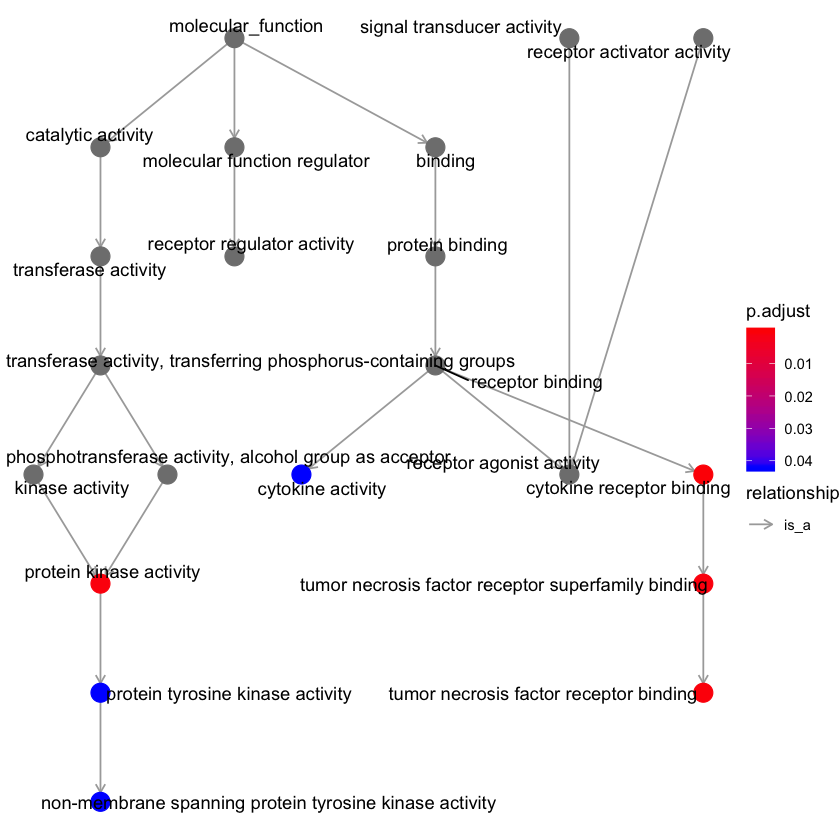

pdf 
  2

pdf 
  2

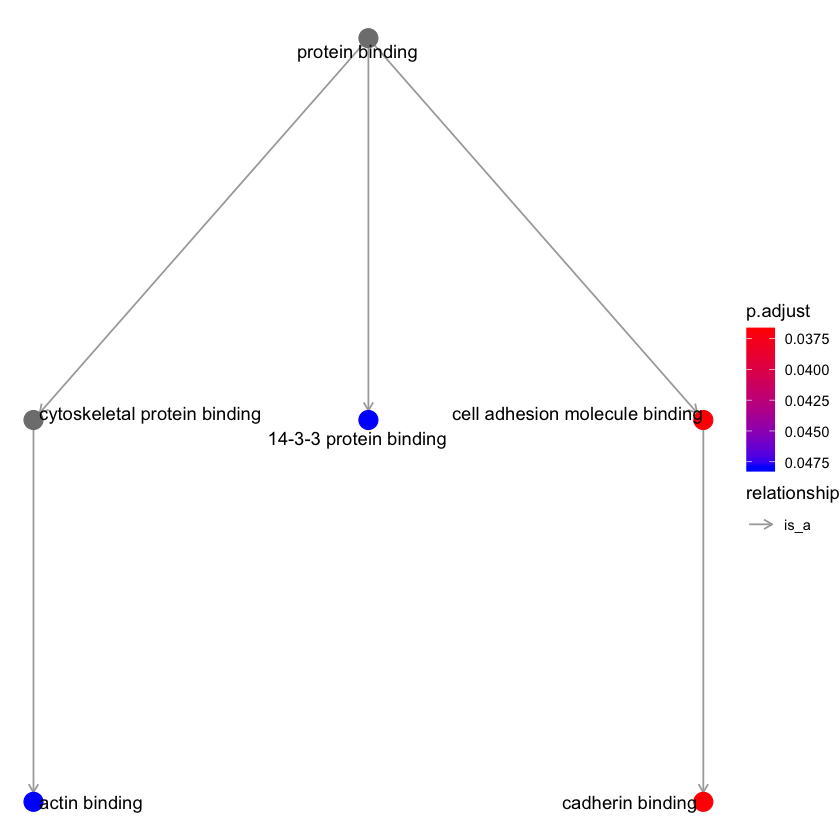

In [15]:
goplot(up_hi_ego_gn)
goplot(up_lo_ego_gn)
#no data?
#goplot(dw_hi_ego_gn)
#goplot(dw_lo_ego_gn)
png("output/plot/up_hi_goplot.png", width = 900, height = 900)
goplot(up_hi_ego_gn)
dev.off()
png("output/plot/up_lo_goplot.png", width = 900, height = 900)
goplot(up_lo_ego_gn)
dev.off()

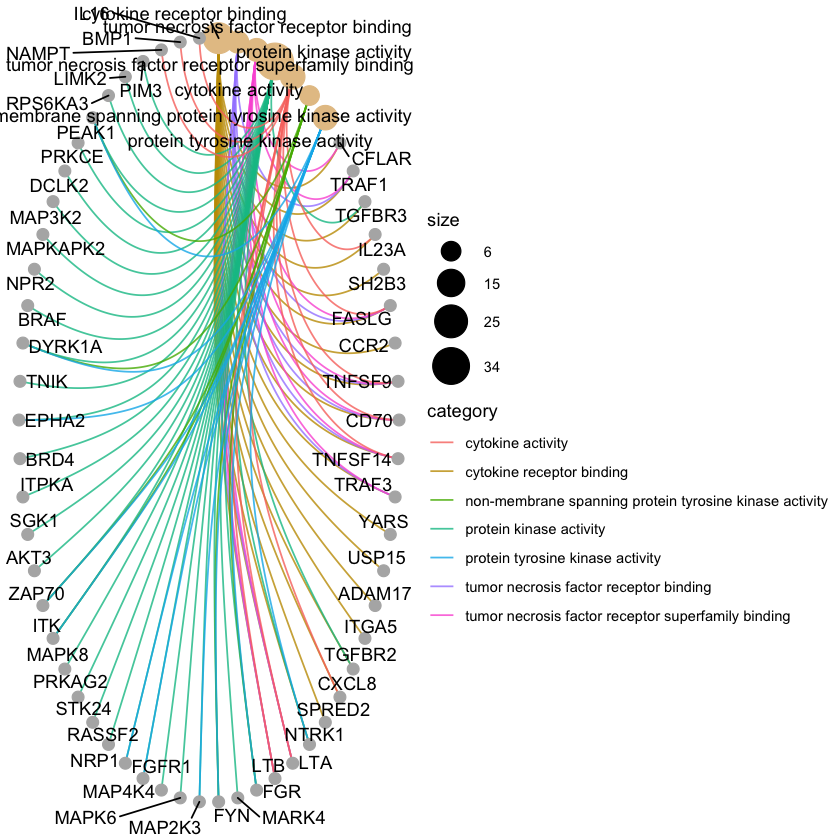

pdf 
  2

pdf 
  2

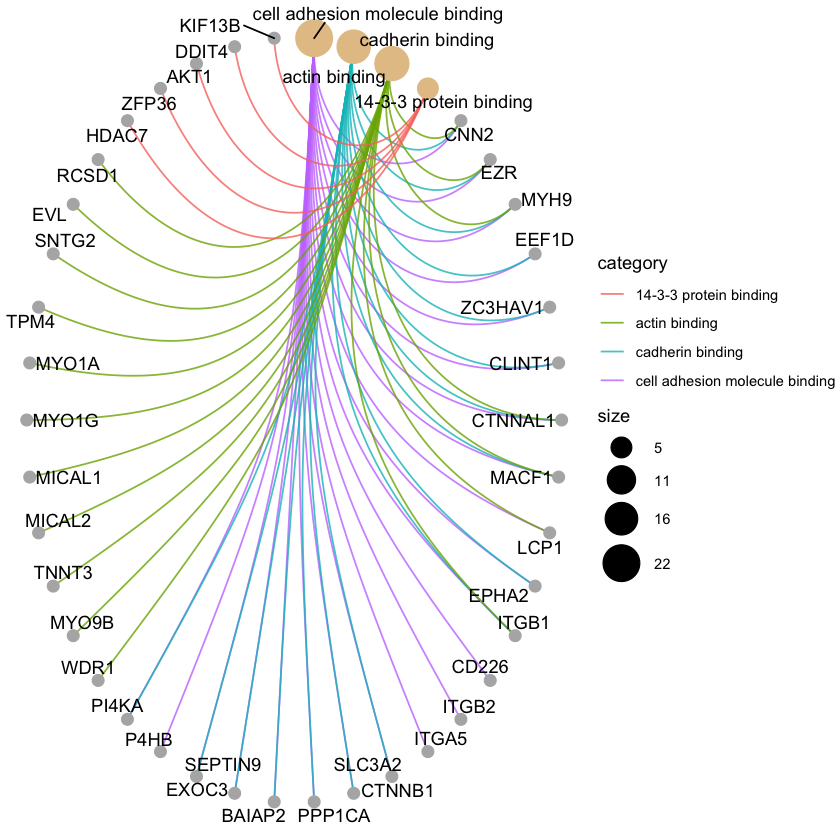

In [16]:
cnetplot(up_hi_ego_gn, circular=TRUE, colorEdge=TRUE, showCategory = 20)
cnetplot(up_lo_ego_gn, circular=TRUE, colorEdge=TRUE, showCategory = 20)
png("output/plot/up_hi_cnet.png", width = 1600, height = 1600)
cnetplot(up_hi_ego_gn, circular=TRUE, colorEdge=TRUE, showCategory = 20)
dev.off()
png("output/plot/up_lo_cnet.png", width = 1600, height = 1600)
cnetplot(up_lo_ego_gn, circular=TRUE, colorEdge=TRUE, showCategory = 20)
dev.off()

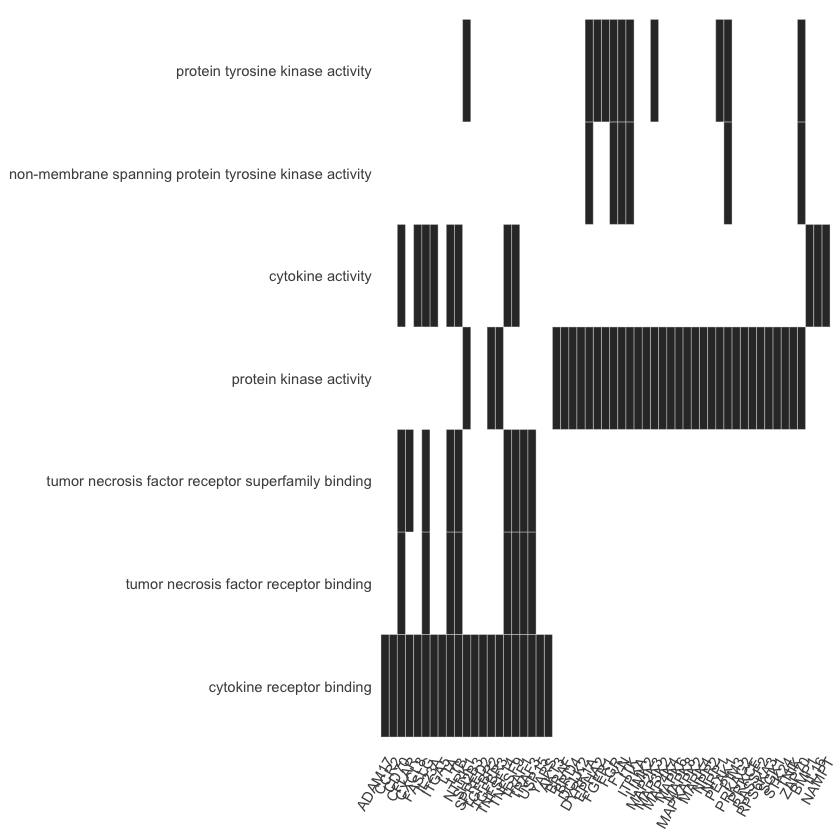

pdf 
  2

pdf 
  2

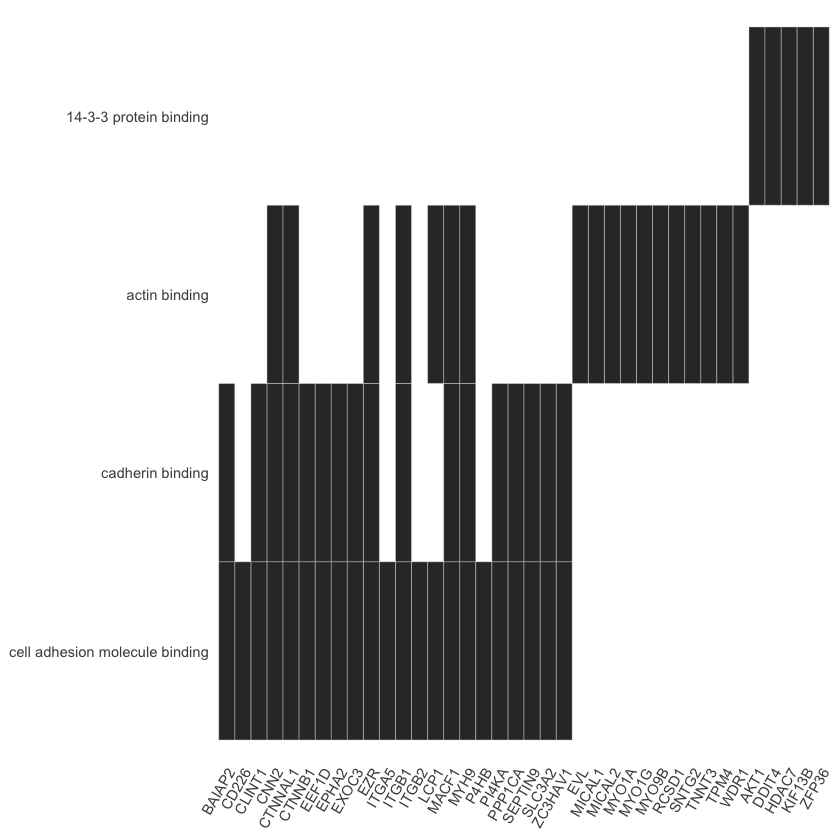

In [17]:
heatplot(up_hi_ego_gn, showCategory = 50)
heatplot(up_lo_ego_gn, showCategory = 50)
png("output/plot/up_hi_heat.png", width = 1600, height = 800)
heatplot(up_hi_ego_gn, showCategory = 50)
dev.off()
png("output/plot/up_lo_heat.png", width = 1600, height = 800)
heatplot(up_lo_ego_gn, showCategory = 50)
dev.off()

### GO Analysis on Shortlists

In [18]:
stock_anno <- read.csv("data_challenge/rnaseq_annotation.txt",sep="\t",header = TRUE)
colnames(stock_anno)

[1] "featureid"                 "chr"                      
 [3] "start"                     "end"                      
 [5] "width"                     "strand"                   
 [7] "source"                    "type"                     
 [9] "score"                     "phase"                    
[11] "gene_id"                   "gene_version"             
[13] "gene_name"                 "gene_source"              
[15] "gene_biotype"              "havana_gene"              
[17] "havana_gene_version"       "transcript_id"            
[19] "transcript_version"        "transcript_name"          
[21] "transcript_source"         "transcript_biotype"       
[23] "havana_transcript"         "havana_transcript_version"
[25] "tag"                       "transcript_support_level" 
[27] "exon_number"               "exon_id"                  
[29] "exon_version"              "ccds_id"                  
[31] "protein_id"                "protein_version"

In [19]:
id2name <- stock_anno[c("gene_id","gene_name")]
head(id2name)

gene_id         gene_name
1 ENSG00000000003 TSPAN6   
2 ENSG00000000005 TNMD     
3 ENSG00000000419 DPM1     
4 ENSG00000000457 SCYL3    
5 ENSG00000000460 C1orf112 
6 ENSG00000000938 FGR

In [20]:
rna_diffx_anno <- merge(id2name, rna_diffx, by.x = "gene_id", by.y = "name", all.y = TRUE)

In [21]:
uphiprox_TFs <- read.csv("output/uphiprox_TFMs.tsv",sep="\t",header = TRUE)
uphiprox_TFs_diffx <- merge(rna_diffx_anno, uphiprox_TFs, by.x = "gene_name", by.y = "motif_alt_ID", all.y = TRUE)
uphiprox_TFs_diffx

gene_name gene_id         chr fstart    fend      score     strand rank
1 CTCFL     NA              NA         NA        NA        NA NA     2   
2 KLF15     ENSG00000163884 3   126342634 126357442 -4.312893 -      5   
3 TFAP2A    NA              NA         NA        NA        NA NA     1   
4 TFAP2B    NA              NA         NA        NA        NA NA     4   
5 TFAP2C    NA              NA         NA        NA        NA NA     3   
6 ZNF148    NA              NA         NA        NA        NA NA     6   
  motif_ID adj_p.value E.value 
1 MA1102.2 3.30e-08    2.11e-05
2 MA1513.1 2.73e-05    1.75e-02
3 MA0810.1 7.36e-09    4.70e-06
4 MA0811.1 9.31e-08    5.95e-05
5 MA0524.2 3.46e-08    2.21e-05
6 MA1653.1 6.90e-05    4.41e-02

In [22]:
hi_TFs <- read.csv("output/hi_TFMs.tsv",sep="\t",header = TRUE)
hi_TFs_diffx <- merge(rna_diffx_anno, hi_TFs, by.x = "gene_name", by.y = "motif_alt_ID", all.y = TRUE)
hi_TFs_diffx <- hi_TFs_diffx[!duplicated(hi_TFs_diffx$gene_id),]
hi_TFs_diffx <- na.omit(hi_TFs_diffx)
head(hi_TFs_diffx)

gene_name gene_id         chr fstart    fend      score     strand rank
3  ATF4      ENSG00000128272 22   39520563  39522683 0.4171834 +      132 
4  BACH1     ENSG00000156273 21   29298870  29346148 0.9229200 +       22 
5  BACH2     ENSG00000112182 6    89926528  90296742 2.8020646 -       23 
14 CREB1     ENSG00000118260 2   207529911 207603431 0.4075965 +       71 
29 FOS       ENSG00000170345 14   75278773  75282230 5.2415679 +        8 
34 FOSB      ENSG00000125740 19   45467994  45475178 1.1296651 +       83 
   motif_ID adj_p.value E.value  
3  MA0833.2  2.66e-06    1.70e-03
4  MA1633.1 3.13e-163   2.00e-160
5  MA1101.2 7.42e-136   4.74e-133
14 MA0018.4  8.93e-16    5.71e-13
29 MA0099.3  0.00e+00    0.00e+00
34 MA1127.1  1.29e-12    8.23e-10

In [23]:
lo_TFs <- read.csv("output/lo_TFMs.tsv",sep="\t",header = TRUE)
lo_TFs_diffx <- merge(rna_diffx_anno, lo_TFs, by.x = "gene_name", by.y = "motif_alt_ID", all.y = TRUE)
lo_TFs_diffx <- hi_TFs_diffx[!duplicated(lo_TFs_diffx$gene_id),]
lo_TFs_diffx <- na.omit(lo_TFs_diffx)
lo_TFs_vshi <- merge(lo_TFs_diffx, hi_TFs_diffx, by.x = "gene_id", by.y = "gene_id", all.x = TRUE)
lo_TFs_vshi <- lo_TFs_diffx[is.na(lo_TFs_diffx$gene_name.y),]
lo_TFs_vshi

gene_name gene_id chr fstart fend score strand rank motif_ID adj_p.value
     E.value

None of the lo_TF sites are unique versus hi_TF sites

In [24]:
hi_TFs_vslo <- merge(hi_TFs_diffx, lo_TFs_diffx, by.x = "gene_id", by.y = "gene_id", all.x = TRUE)
hi_TFs_vslo <- hi_TFs_vslo[is.na(hi_TFs_vslo$gene_name.y),]

In [25]:
hi_TFs_vslo_list <- hi_TFs_vslo[,6]
names(hi_TFs_vslo_list) = as.character(hi_TFs_vslo[,1])
hi_TFs_vslo_list = sort(hi_TFs_vslo_list, decreasing = TRUE)
hi_TFs_vslo_vec <- names(hi_TFs_vslo_list)
hi_TFs_vslo_ego <- enrichGO(gene = hi_TFs_vslo_vec, universe = rna_bgd, OrgDb = org.Hs.eg.db, keyType = "ENSEMBL")
hi_TFs_vslo_ego <- setReadable(hi_TFs_vslo_ego, 'org.Hs.eg.db', 'ENSEMBL')

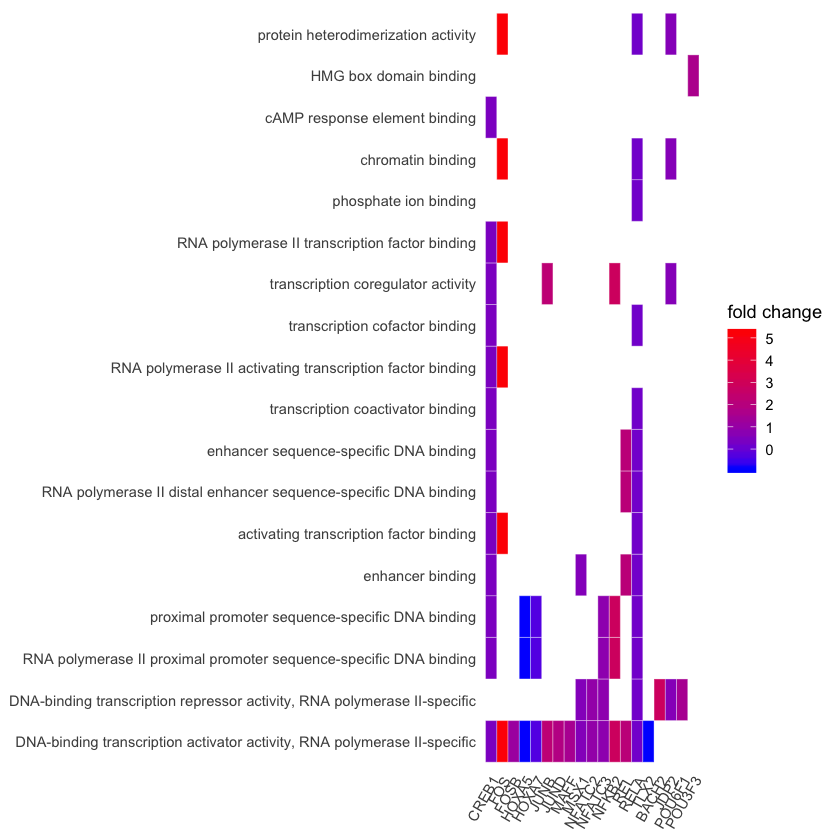

pdf 
  2

pdf 
  2

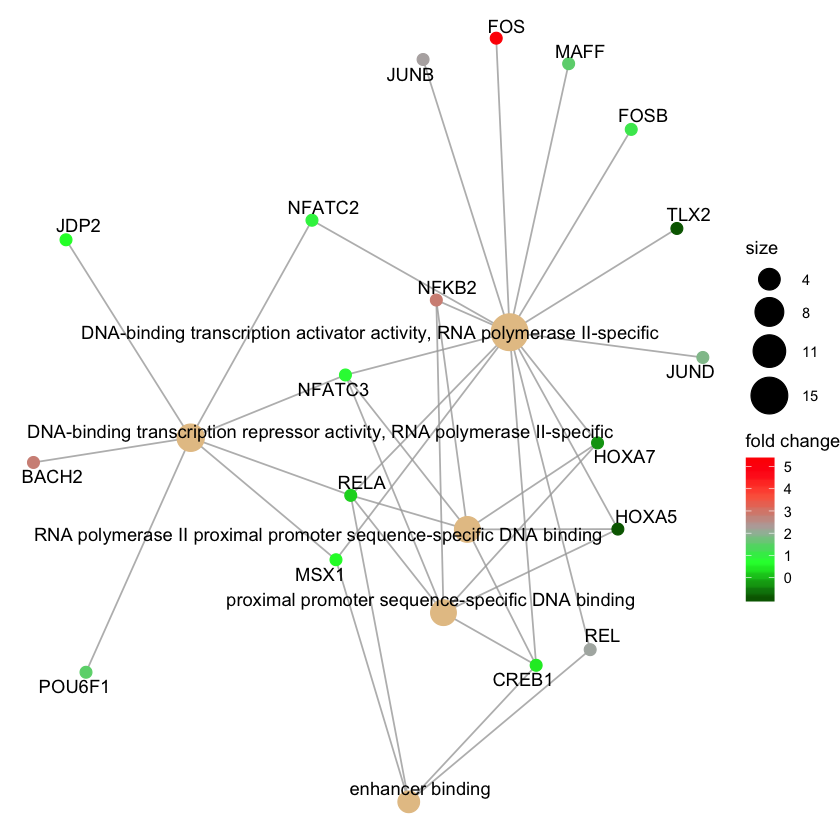

In [26]:
heatplot(hi_TFs_vslo_ego, foldChange=hi_TFs_vslo_list)
cnetplot(hi_TFs_vslo_ego, foldChange=hi_TFs_vslo_list)
png("output/plot/hiTFs_cnet.png", width = 900, height = 900)
cnetplot(hi_TFs_vslo_ego, foldChange=hi_TFs_vslo_list)
dev.off()
png("output/plot/hiTFs_heat.png", width = 900, height = 900)
heatplot(hi_TFs_vslo_ego, foldChange=hi_TFs_vslo_list)
dev.off()

## Interpretation
The GO Analysis on the RNA-Seq Data clearly showed many genes involved in histone methyltransferase activity are downregulated, which may be a clue to the mechanism of chromatin accessibility changes induced.
The upregulated genes indicated cytokine/TNF receptors were activated leading to a cascade of changes triggering changes in phosphorylation activity, chromatin and transcription factor activation.
These points are especially clear in the emap plots and heatmaps.

There is also some indication of hormone receptor binding activity although the cytokine/TNF pathway looks most strongly activated via the chromatin remodelling as evidenced by the GO terms associated with genes upregulated with increased accessibility in their regulatory regions (up_hi_goplot). Perhaps the hormone receptor binding is more upstream of the chromatin remodelling program and potentially the treatment applied?

The Gene Set Enrichment Analysis Heatmap (rna_diffx_gsea) also indicated a number of leukocyte activation genes are regulated. Most notably IL2RA is upregulated indicating activation of T or B cells. TNF cytokine expression is also highly upregulated so this may be an immune cell line responding to some pro-inflammatory treatment? EGR1 is also highly expressed and upstream of DNA demethylation pathways.

It appears that decrease in chromatin accessibility liberated some genes involved in cell adhesion from repressors (up_lo_goplot).

The motif search showed some specific TF motifs are enriched in the more accessible regions. Those TFs found to be differentially expressed by cross referencing with the RNASeq form a fairly small list: CREB1, FOS, FOSB, HOXA5, HOXA7, JUNB, JUND, MAFF, MSX1, NFATC2, NFATC3, NFKB2, REL, RELA, TLX2, BACH2, JDP2, POU6F1, POU3F3.

FOS or c-Fos is the most highly expressed of these TFs, it's also connected to chromatin binding activity. Together with EGR1 it's a top candidate stimulated by growth factors (hormones) or cytokine stimuli.